In [13]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#import seaborn as sns

pepper = pd.read_csv('C:/sa/week/pepper_week2.csv')

pepper.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),"14,347",1.657143,-3.242857,7.628571,0.442857,1061.77,9045.75,66801060,NaN,NaN,5645479.168,694.615385,62.964
1,01월 2주 (2014.01.09 ~ 2014.01.15),"14,244",-2.700000,-7.728571,2.900000,0.000000,1061.80,"9,046","66,801,060",NaN,NaN,5645479.168,694.615385,62.964
2,01월 3주 (2014.01.16 ~ 2014.01.22),"14,467",-1.128571,-5.742857,4.057143,0.414286,1080.35,"9,046","66,801,060",NaN,NaN,5645479.168,694.615385,62.964
3,01월 4주 (2014.01.23 ~ 2014.01.29),"16,148",-1.000000,-4.314286,9.100000,0.414286,1081.31,9045.75,66801060,NaN,NaN,5645479.168,694.615385,62.964
4,02월 1주 (2014.02.03 ~ 2014.02.05),"16,144",2.671429,-2.285714,8.085714,1.071429,1075.00,7538,58088630.25,NaN,NaN,5645479.168,694.615385,87.809


In [14]:
pepper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week              557 non-null    object 
 1   retail price      557 non-null    object 
 2   avgTemp           557 non-null    float64
 3   minTemp           557 non-null    float64
 4   maxTemp           557 non-null    float64
 5   rainfall          557 non-null    float64
 6   exchange rate     557 non-null    float64
 7   export volume     552 non-null    object 
 8   export value      552 non-null    object 
 9   import volume     151 non-null    float64
 10  import value      111 non-null    object 
 11  production        522 non-null    float64
 12  cultivation area  557 non-null    float64
 13  market price      556 non-null    float64
dtypes: float64(9), object(5)
memory usage: 61.1+ KB


In [15]:
for column in pepper.columns:
    if pepper[column].dtype == 'object':
        pepper[column] = pepper[column].str.replace(',','')


for column in pepper.select_dtypes(include=['object']).columns:
    if column != 'week':
        pepper[column] = pd.to_numeric(pepper[column])

pepper = pepper.replace(0,np.nan)

pepper.head()



,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),14347,1.657143,-3.242857,7.628571,0.442857,1061.77,9045.75,66801060.00,NaN,NaN,5645479.168,694.615385,62.964
1,01월 2주 (2014.01.09 ~ 2014.01.15),14244,-2.700000,-7.728571,2.900000,NaN,1061.80,9046.00,66801060.00,NaN,NaN,5645479.168,694.615385,62.964
2,01월 3주 (2014.01.16 ~ 2014.01.22),14467,-1.128571,-5.742857,4.057143,0.414286,1080.35,9046.00,66801060.00,NaN,NaN,5645479.168,694.615385,62.964
3,01월 4주 (2014.01.23 ~ 2014.01.29),16148,-1.000000,-4.314286,9.100000,0.414286,1081.31,9045.75,66801060.00,NaN,NaN,5645479.168,694.615385,62.964
4,02월 1주 (2014.02.03 ~ 2014.02.05),16144,2.671429,-2.285714,8.085714,1.071429,1075.00,7538.00,58088630.25,NaN,NaN,5645479.168,694.615385,87.809


In [16]:
nan_var = pepper.isna().sum()/len(pepper)
nan_var[nan_var>=0.5]

import volume     0.852783
import value      0.816876
dtype: float64

In [17]:
remove_col = nan_var[nan_var>=0.5].index
pepper=pepper.drop(remove_col, axis=1)
pepper.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),14347,1.657143,-3.242857,7.628571,0.442857,1061.77,9045.75,66801060.00,5645479.168,694.615385,62.964
1,01월 2주 (2014.01.09 ~ 2014.01.15),14244,-2.700000,-7.728571,2.900000,NaN,1061.80,9046.00,66801060.00,5645479.168,694.615385,62.964
2,01월 3주 (2014.01.16 ~ 2014.01.22),14467,-1.128571,-5.742857,4.057143,0.414286,1080.35,9046.00,66801060.00,5645479.168,694.615385,62.964
3,01월 4주 (2014.01.23 ~ 2014.01.29),16148,-1.000000,-4.314286,9.100000,0.414286,1081.31,9045.75,66801060.00,5645479.168,694.615385,62.964
4,02월 1주 (2014.02.03 ~ 2014.02.05),16144,2.671429,-2.285714,8.085714,1.071429,1075.00,7538.00,58088630.25,5645479.168,694.615385,87.809


In [18]:
pepper.isna().sum()

week                 0
retail price         0
avgTemp              0
minTemp              1
maxTemp              0
rainfall            19
exchange rate        0
export volume        5
export value         5
production          35
cultivation area     0
market price         1
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

numeric_cols = pepper.select_dtypes(include=['number']).columns


imputer = SimpleImputer(strategy='mean')
pepper[numeric_cols] = imputer.fit_transform(pepper[numeric_cols])

pepper.isna().sum()

week                0
retail price        0
avgTemp             0
minTemp             0
maxTemp             0
rainfall            0
exchange rate       0
export volume       0
export value        0
production          0
cultivation area    0
market price        0
dtype: int64

In [20]:
X= pepper[['exchange rate','avgTemp','maxTemp','minTemp','rainfall','export volume ','export value','production',
          'cultivation area', 'market price']]
y =pepper['retail price']

X_names = X.columns
X_names

Index(['exchange rate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'export volume ', 'export value', 'production', 'cultivation area',
       'market price'],
      dtype='object')

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression


sel_fr = SelectKBest(f_regression, k=4).fit(X, y)
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 


f_regression: 

Selected features:  ['exchange rate', 'minTemp', 'production', 'market price']


In [22]:

# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor



knn = KNeighborsRegressor(n_neighbors=4)
sfs = SequentialFeatureSelector(knn, n_features_to_select=4, direction='forward')


sfs.fit(X,y)


X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')


X_selected_names = ['avgTemp', 'maxTemp', 'minTemp', 'market price']


### LSTM

In [23]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = pepper[['avgTemp', 'minTemp', 'market price']].values
y = pepper[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    lstm_model = Sequential()
    lstm_model.add(LSTM(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.1)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=90, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = lstm_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')




Fold 1
Epoch 1/90


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 67ms/step - loss: 0.0507 - mae: 0.1635 - val_loss: 0.0262 - val_mae: 0.1415
Epoch 2/90
45/45 - 0s - 4ms/step - loss: 0.0190 - mae: 0.1073 - val_loss: 0.0213 - val_mae: 0.1224
Epoch 3/90
45/45 - 0s - 4ms/step - loss: 0.0151 - mae: 0.0923 - val_loss: 0.0167 - val_mae: 0.1031
Epoch 4/90
45/45 - 0s - 4ms/step - loss: 0.0159 - mae: 0.0934 - val_loss: 0.0243 - val_mae: 0.1298
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0158 - mae: 0.0941 - val_loss: 0.0172 - val_mae: 0.1074
Epoch 6/90
45/45 - 0s - 4ms/step - loss: 0.0152 - mae: 0.0930 - val_loss: 0.0145 - val_mae: 0.0927
Epoch 7/90
45/45 - 0s - 4ms/step - loss: 0.0149 - mae: 0.0899 - val_loss: 0.0212 - val_mae: 0.1171
Epoch 8/90
45/45 - 0s - 4ms/step - loss: 0.0143 - mae: 0.0903 - val_loss: 0.0142 - val_mae: 0.0909
Epoch 9/90
45/45 - 0s - 4ms/step - loss: 0.0163 - mae: 0.0961 - val_loss: 0.0145 - val_mae: 0.0944
Epoch 10/90
45/45 - 0s - 4ms/step - loss: 0.0154 - mae: 0.0935 - val_loss: 0.0129 - val_mae: 0.0886
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.0540 - mae: 0.1647 - val_loss: 0.0216 - val_mae: 0.1000
Epoch 2/90
45/45 - 0s - 4ms/step - loss: 0.0163 - mae: 0.0966 - val_loss: 0.0175 - val_mae: 0.0907
Epoch 3/90
45/45 - 0s - 4ms/step - loss: 0.0156 - mae: 0.0961 - val_loss: 0.0187 - val_mae: 0.1023
Epoch 4/90
45/45 - 0s - 4ms/step - loss: 0.0164 - mae: 0.0960 - val_loss: 0.0175 - val_mae: 0.0894
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0141 - mae: 0.0904 - val_loss: 0.0166 - val_mae: 0.0962
Epoch 6/90
45/45 - 0s - 4ms/step - loss: 0.0161 - mae: 0.0964 - val_loss: 0.0167 - val_mae: 0.0899
Epoch 7/90
45/45 - 0s - 4ms/step - loss: 0.0143 - mae: 0.0907 - val_loss: 0.0222 - val_mae: 0.1044
Epoch 8/90
45/45 - 0s - 4ms/step - loss: 0.0136 - mae: 0.0870 - val_loss: 0.0193 - val_mae: 0.0933
Epoch 9/90
45/45 - 0s - 4ms/step - loss: 0.0142 - mae: 0.0907 - val_loss: 0.0167 - val_mae: 0.0967
Epoch 10/90
45/45 - 0s - 4ms/step - loss: 0.0155 - mae: 0.0946 - val_loss: 0.0173 - val_mae: 0.0877
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.0427 - mae: 0.1479 - val_loss: 0.0156 - val_mae: 0.0978
Epoch 2/90
45/45 - 0s - 4ms/step - loss: 0.0160 - mae: 0.0958 - val_loss: 0.0142 - val_mae: 0.0914
Epoch 3/90
45/45 - 0s - 4ms/step - loss: 0.0155 - mae: 0.0926 - val_loss: 0.0164 - val_mae: 0.0910
Epoch 4/90
45/45 - 0s - 5ms/step - loss: 0.0159 - mae: 0.0935 - val_loss: 0.0145 - val_mae: 0.0949
Epoch 5/90
45/45 - 0s - 6ms/step - loss: 0.0151 - mae: 0.0929 - val_loss: 0.0159 - val_mae: 0.0902
Epoch 6/90
45/45 - 0s - 6ms/step - loss: 0.0142 - mae: 0.0897 - val_loss: 0.0192 - val_mae: 0.1024
Epoch 7/90
45/45 - 0s - 6ms/step - loss: 0.0135 - mae: 0.0863 - val_loss: 0.0139 - val_mae: 0.0907
Epoch 8/90
45/45 - 0s - 6ms/step - loss: 0.0153 - mae: 0.0913 - val_loss: 0.0205 - val_mae: 0.1027
Epoch 9/90
45/45 - 0s - 6ms/step - loss: 0.0164 - mae: 0.0936 - val_loss: 0.0152 - val_mae: 0.0905
Epoch 10/90
45/45 - 0s - 6ms/step - loss: 0.0159 - mae: 0.0942 - val_loss: 0.0135 - val_mae: 0.0913
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 55ms/step - loss: 0.0676 - mae: 0.1735 - val_loss: 0.0121 - val_mae: 0.0824
Epoch 2/90
45/45 - 0s - 10ms/step - loss: 0.0205 - mae: 0.1129 - val_loss: 0.0116 - val_mae: 0.0794
Epoch 3/90
45/45 - 0s - 5ms/step - loss: 0.0182 - mae: 0.1024 - val_loss: 0.0095 - val_mae: 0.0696
Epoch 4/90
45/45 - 0s - 5ms/step - loss: 0.0185 - mae: 0.1056 - val_loss: 0.0151 - val_mae: 0.0961
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0172 - mae: 0.0994 - val_loss: 0.0111 - val_mae: 0.0763
Epoch 6/90
45/45 - 0s - 4ms/step - loss: 0.0174 - mae: 0.0997 - val_loss: 0.0091 - val_mae: 0.0685
Epoch 7/90
45/45 - 0s - 6ms/step - loss: 0.0156 - mae: 0.0941 - val_loss: 0.0089 - val_mae: 0.0681
Epoch 8/90
45/45 - 0s - 6ms/step - loss: 0.0171 - mae: 0.1004 - val_loss: 0.0153 - val_mae: 0.0973
Epoch 9/90
45/45 - 0s - 5ms/step - loss: 0.0156 - mae: 0.0917 - val_loss: 0.0095 - val_mae: 0.0735
Epoch 10/90
45/45 - 0s - 4ms/step - loss: 0.0166 - mae: 0.0994 - val_loss: 0.0089 - val_mae: 0.0680
Epoch 11/90
45/45 

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.1007 - mae: 0.1972 - val_loss: 0.0200 - val_mae: 0.1043
Epoch 2/90
45/45 - 0s - 4ms/step - loss: 0.0176 - mae: 0.1009 - val_loss: 0.0154 - val_mae: 0.0940
Epoch 3/90
45/45 - 0s - 4ms/step - loss: 0.0167 - mae: 0.0965 - val_loss: 0.0152 - val_mae: 0.0936
Epoch 4/90
45/45 - 0s - 4ms/step - loss: 0.0163 - mae: 0.0945 - val_loss: 0.0162 - val_mae: 0.1032
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0151 - mae: 0.0906 - val_loss: 0.0136 - val_mae: 0.0858
Epoch 6/90
45/45 - 0s - 4ms/step - loss: 0.0150 - mae: 0.0916 - val_loss: 0.0144 - val_mae: 0.0865
Epoch 7/90
45/45 - 0s - 4ms/step - loss: 0.0149 - mae: 0.0916 - val_loss: 0.0133 - val_mae: 0.0892
Epoch 8/90
45/45 - 0s - 4ms/step - loss: 0.0151 - mae: 0.0932 - val_loss: 0.0133 - val_mae: 0.0874
Epoch 9/90
45/45 - 0s - 4ms/step - loss: 0.0144 - mae: 0.0881 - val_loss: 0.0137 - val_mae: 0.0872
Epoch 10/90
45/45 - 0s - 4ms/step - loss: 0.0151 - mae: 0.0910 - val_loss: 0.0147 - val_mae: 0.0875
Epoch 11/90
45/45 -

In [ ]:
import numpy as np
import pandas as pd

def predict_future_weeks_extended(model, initial_data, scalerX, scalerY, weeks=13):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 예측을 100번 수행하고 평균값 계산
num_predictions = 100
all_predictions = []

# 초기 데이터 설정 (고추 관련 데이터)
initial_data = pepper[['avgTemp', 'minTemp', 'market price']].values[-1].reshape(1, -1)

for _ in range(num_predictions):
    predicted_prices = predict_future_weeks_extended(lstm_model, initial_data, scalerX, scalerY, weeks=13)
    all_predictions.append(predicted_prices)

# numpy 배열로 변환하여 평균값 계산
all_predictions = np.array(all_predictions)
average_predictions = np.mean(all_predictions, axis=0)

# 평균 예측 결과 출력
average_predictions_df = pd.DataFrame(average_predictions, columns=['Average Predicted Retail Price'])
average_predictions_df.index = pd.date_range(start='2024-09-01', periods=13, freq='W-SUN')
print(average_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [ ]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### GRU

In [39]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = pepper[['avgTemp', 'minTemp', 'market price']].values
y = pepper[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    gru_model = Sequential()
    gru_model.add(GRU(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    gru_model.add(Dropout(0.1))
    gru_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.1)
    gru_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=90, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = gru_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')

Fold 1
Epoch 1/90


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 48ms/step - loss: 0.0670 - mae: 0.1767 - val_loss: 0.0201 - val_mae: 0.1083
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0153 - mae: 0.0925 - val_loss: 0.0143 - val_mae: 0.0936
Epoch 3/90
45/45 - 0s - 4ms/step - loss: 0.0177 - mae: 0.0989 - val_loss: 0.0137 - val_mae: 0.0880
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0195 - mae: 0.1061 - val_loss: 0.0240 - val_mae: 0.1189
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0159 - mae: 0.0948 - val_loss: 0.0150 - val_mae: 0.0973
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0176 - mae: 0.1020 - val_loss: 0.0169 - val_mae: 0.1051
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0166 - mae: 0.0986 - val_loss: 0.0200 - val_mae: 0.1087
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0148 - mae: 0.0903 - val_loss: 0.0148 - val_mae: 0.0946
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0168 - mae: 0.0974 - val_loss: 0.0243 - val_mae: 0.1341
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0160 - mae: 0.0972 - val_loss: 0.0194 - val_mae: 0.1090
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 58ms/step - loss: 0.1003 - mae: 0.2162 - val_loss: 0.0327 - val_mae: 0.1271
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0252 - mae: 0.1174 - val_loss: 0.0160 - val_mae: 0.0869
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0175 - mae: 0.1010 - val_loss: 0.0230 - val_mae: 0.1026
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0170 - mae: 0.0986 - val_loss: 0.0166 - val_mae: 0.0871
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0158 - mae: 0.0972 - val_loss: 0.0241 - val_mae: 0.1119
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0162 - mae: 0.1004 - val_loss: 0.0161 - val_mae: 0.0915
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0164 - mae: 0.0952 - val_loss: 0.0231 - val_mae: 0.1078
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0163 - mae: 0.0983 - val_loss: 0.0173 - val_mae: 0.1043
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0173 - mae: 0.0975 - val_loss: 0.0173 - val_mae: 0.0899
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0146 - mae: 0.0923 - val_loss: 0.0177 - val_mae: 0.0962
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.1060 - mae: 0.2069 - val_loss: 0.0218 - val_mae: 0.1155
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0202 - mae: 0.1078 - val_loss: 0.0185 - val_mae: 0.1160
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0182 - mae: 0.1047 - val_loss: 0.0146 - val_mae: 0.0892
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0182 - mae: 0.0980 - val_loss: 0.0151 - val_mae: 0.0969
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0156 - mae: 0.0947 - val_loss: 0.0158 - val_mae: 0.1001
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0160 - mae: 0.0941 - val_loss: 0.0170 - val_mae: 0.1030
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0167 - mae: 0.0980 - val_loss: 0.0241 - val_mae: 0.1282
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0197 - mae: 0.1019 - val_loss: 0.0186 - val_mae: 0.0984
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0161 - mae: 0.0934 - val_loss: 0.0187 - val_mae: 0.1106
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0174 - mae: 0.0995 - val_loss: 0.0175 - val_mae: 0.1034
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 5s - 106ms/step - loss: 0.0979 - mae: 0.1985 - val_loss: 0.0115 - val_mae: 0.0841
Epoch 2/90
45/45 - 0s - 4ms/step - loss: 0.0210 - mae: 0.1077 - val_loss: 0.0107 - val_mae: 0.0757
Epoch 3/90
45/45 - 0s - 4ms/step - loss: 0.0174 - mae: 0.0990 - val_loss: 0.0159 - val_mae: 0.0976
Epoch 4/90
45/45 - 0s - 4ms/step - loss: 0.0199 - mae: 0.1059 - val_loss: 0.0114 - val_mae: 0.0773
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0173 - mae: 0.0978 - val_loss: 0.0124 - val_mae: 0.0885
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0162 - mae: 0.0969 - val_loss: 0.0102 - val_mae: 0.0779
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0175 - mae: 0.0979 - val_loss: 0.0111 - val_mae: 0.0826
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0154 - mae: 0.0945 - val_loss: 0.0108 - val_mae: 0.0715
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0195 - mae: 0.1075 - val_loss: 0.0155 - val_mae: 0.0963
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0178 - mae: 0.1005 - val_loss: 0.0096 - val_mae: 0.0712
Epoch 11/90
45/45 

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.0680 - mae: 0.1800 - val_loss: 0.0261 - val_mae: 0.1139
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0190 - mae: 0.1067 - val_loss: 0.0154 - val_mae: 0.0985
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0190 - mae: 0.1019 - val_loss: 0.0182 - val_mae: 0.1102
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0158 - mae: 0.0948 - val_loss: 0.0138 - val_mae: 0.0884
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0157 - mae: 0.0953 - val_loss: 0.0205 - val_mae: 0.1218
Epoch 6/90
45/45 - 0s - 4ms/step - loss: 0.0179 - mae: 0.1029 - val_loss: 0.0134 - val_mae: 0.0872
Epoch 7/90
45/45 - 0s - 4ms/step - loss: 0.0150 - mae: 0.0903 - val_loss: 0.0161 - val_mae: 0.1023
Epoch 8/90
45/45 - 0s - 4ms/step - loss: 0.0167 - mae: 0.0967 - val_loss: 0.0142 - val_mae: 0.0883
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0186 - mae: 0.1039 - val_loss: 0.0136 - val_mae: 0.0879
Epoch 10/90
45/45 - 0s - 4ms/step - loss: 0.0154 - mae: 0.0929 - val_loss: 0.0190 - val_mae: 0.1082
Epoch 11/90
45/45 -

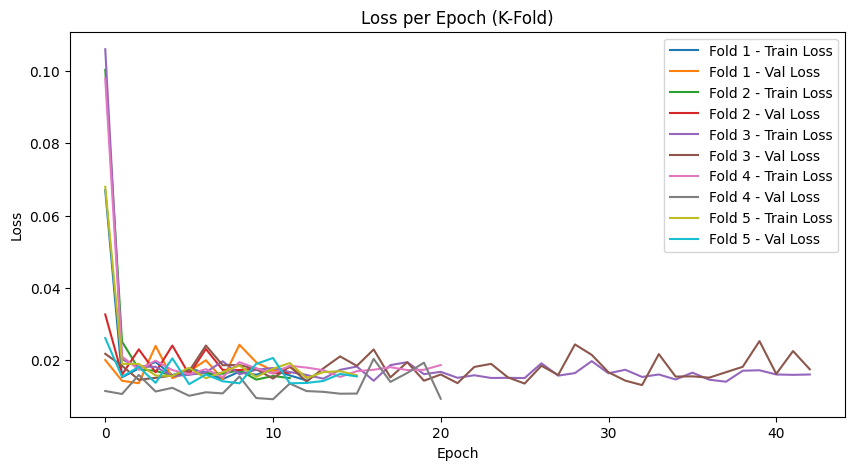

In [40]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

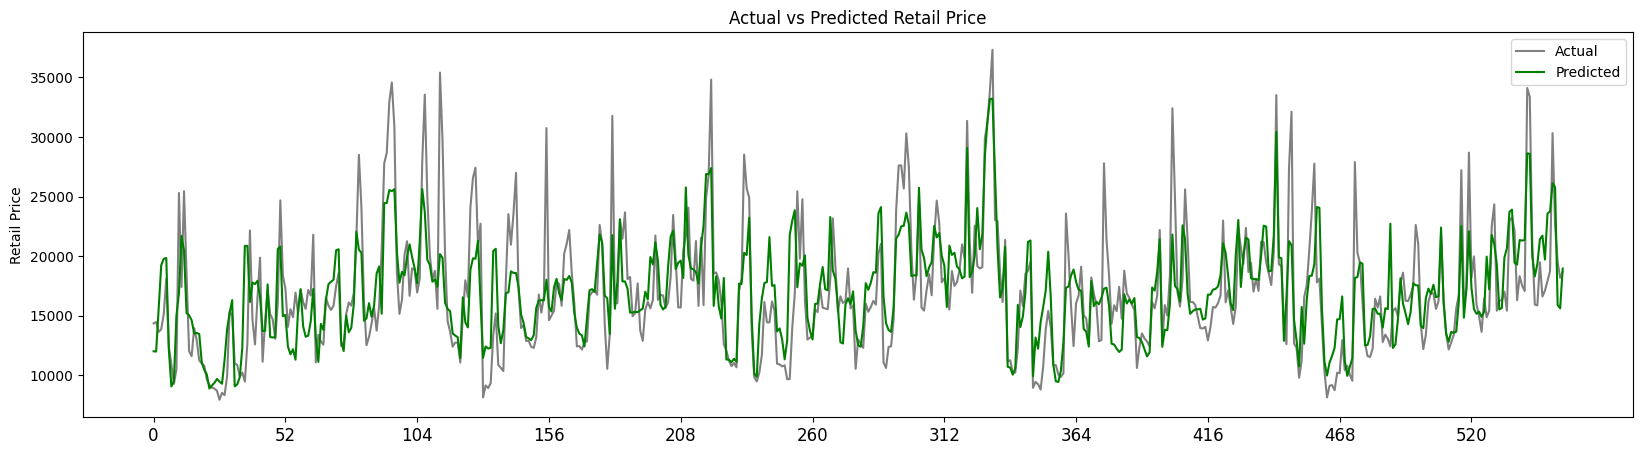

In [41]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### RNN

In [42]:
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = pepper[['avgTemp', 'minTemp', 'market price']].values
y = pepper[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.1)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=90, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = rnn_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/90


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 38ms/step - loss: 0.7162 - mae: 0.5304 - val_loss: 0.0365 - val_mae: 0.1494
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0834 - mae: 0.2311 - val_loss: 0.0456 - val_mae: 0.1865
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0467 - mae: 0.1671 - val_loss: 0.0837 - val_mae: 0.2340
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0569 - mae: 0.1830 - val_loss: 0.0873 - val_mae: 0.2726
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0375 - mae: 0.1500 - val_loss: 0.0254 - val_mae: 0.1081
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0648 - mae: 0.2012 - val_loss: 0.0343 - val_mae: 0.1534
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0445 - mae: 0.1644 - val_loss: 0.0317 - val_mae: 0.1547
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0332 - mae: 0.1406 - val_loss: 0.0259 - val_mae: 0.1100
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0488 - mae: 0.1705 - val_loss: 0.0368 - val_mae: 0.1685
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0454 - mae: 0.1652 - val_loss: 0.0219 - val_mae: 0.1188
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 47ms/step - loss: 0.6501 - mae: 0.5450 - val_loss: 0.0524 - val_mae: 0.1679
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0916 - mae: 0.2324 - val_loss: 0.0307 - val_mae: 0.1304
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0603 - mae: 0.1966 - val_loss: 0.0811 - val_mae: 0.2359
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0646 - mae: 0.2027 - val_loss: 0.0751 - val_mae: 0.2250
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0559 - mae: 0.1842 - val_loss: 0.0214 - val_mae: 0.1137
Epoch 6/90
45/45 - 0s - 4ms/step - loss: 0.0414 - mae: 0.1620 - val_loss: 0.0278 - val_mae: 0.1178
Epoch 7/90
45/45 - 0s - 4ms/step - loss: 0.0371 - mae: 0.1495 - val_loss: 0.0246 - val_mae: 0.1289
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0289 - mae: 0.1308 - val_loss: 0.0295 - val_mae: 0.1292
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0428 - mae: 0.1621 - val_loss: 0.0222 - val_mae: 0.1253
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0574 - mae: 0.1903 - val_loss: 0.0755 - val_mae: 0.2200
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 41ms/step - loss: 0.7954 - mae: 0.5874 - val_loss: 0.2215 - val_mae: 0.4288
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.1111 - mae: 0.2601 - val_loss: 0.1286 - val_mae: 0.3255
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0549 - mae: 0.1832 - val_loss: 0.1908 - val_mae: 0.3951
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0521 - mae: 0.1769 - val_loss: 0.0652 - val_mae: 0.2277
Epoch 5/90
45/45 - 0s - 4ms/step - loss: 0.0445 - mae: 0.1650 - val_loss: 0.0462 - val_mae: 0.1891
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0659 - mae: 0.2002 - val_loss: 0.0319 - val_mae: 0.1428
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0615 - mae: 0.1941 - val_loss: 0.0371 - val_mae: 0.1433
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0594 - mae: 0.1882 - val_loss: 0.0445 - val_mae: 0.1867
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0569 - mae: 0.1911 - val_loss: 0.0316 - val_mae: 0.1416
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0383 - mae: 0.1522 - val_loss: 0.0504 - val_mae: 0.1660
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 40ms/step - loss: 0.7436 - mae: 0.5215 - val_loss: 0.0870 - val_mae: 0.2541
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.1150 - mae: 0.2641 - val_loss: 0.0761 - val_mae: 0.2512
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0519 - mae: 0.1752 - val_loss: 0.0464 - val_mae: 0.1722
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0440 - mae: 0.1624 - val_loss: 0.0196 - val_mae: 0.1064
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0456 - mae: 0.1680 - val_loss: 0.0286 - val_mae: 0.1276
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0511 - mae: 0.1787 - val_loss: 0.1039 - val_mae: 0.2931
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0906 - mae: 0.2447 - val_loss: 0.0180 - val_mae: 0.0945
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0714 - mae: 0.2166 - val_loss: 0.0416 - val_mae: 0.1771
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0616 - mae: 0.2037 - val_loss: 0.0388 - val_mae: 0.1558
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0689 - mae: 0.2109 - val_loss: 0.0171 - val_mae: 0.0929
Epoch 11/90
45/45 -

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 39ms/step - loss: 0.8465 - mae: 0.6677 - val_loss: 0.0811 - val_mae: 0.2586
Epoch 2/90
45/45 - 0s - 3ms/step - loss: 0.0886 - mae: 0.2325 - val_loss: 0.0317 - val_mae: 0.1243
Epoch 3/90
45/45 - 0s - 3ms/step - loss: 0.0599 - mae: 0.1935 - val_loss: 0.1007 - val_mae: 0.2926
Epoch 4/90
45/45 - 0s - 3ms/step - loss: 0.0514 - mae: 0.1778 - val_loss: 0.0275 - val_mae: 0.1291
Epoch 5/90
45/45 - 0s - 3ms/step - loss: 0.0498 - mae: 0.1738 - val_loss: 0.0428 - val_mae: 0.1491
Epoch 6/90
45/45 - 0s - 3ms/step - loss: 0.0603 - mae: 0.1915 - val_loss: 0.0272 - val_mae: 0.1123
Epoch 7/90
45/45 - 0s - 3ms/step - loss: 0.0341 - mae: 0.1448 - val_loss: 0.0308 - val_mae: 0.1241
Epoch 8/90
45/45 - 0s - 3ms/step - loss: 0.0565 - mae: 0.1921 - val_loss: 0.0989 - val_mae: 0.2714
Epoch 9/90
45/45 - 0s - 3ms/step - loss: 0.0453 - mae: 0.1651 - val_loss: 0.0375 - val_mae: 0.1685
Epoch 10/90
45/45 - 0s - 3ms/step - loss: 0.0300 - mae: 0.1381 - val_loss: 0.0230 - val_mae: 0.1249
Epoch 11/90
45/45 -

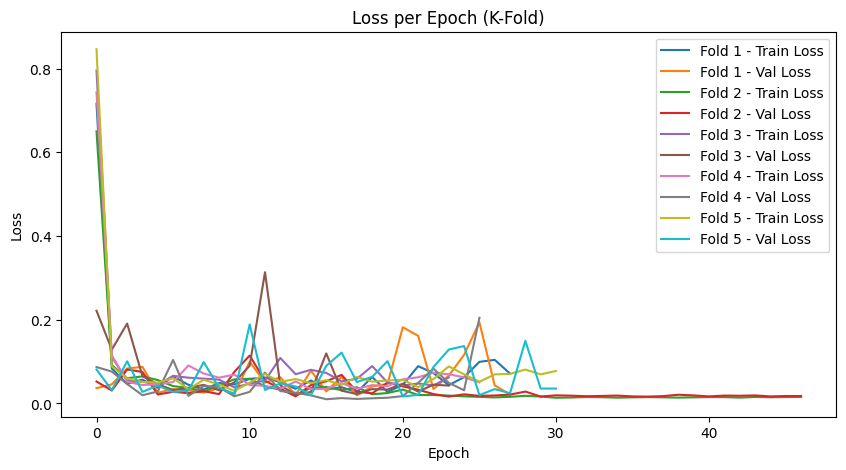

In [43]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### RNN 성능평가

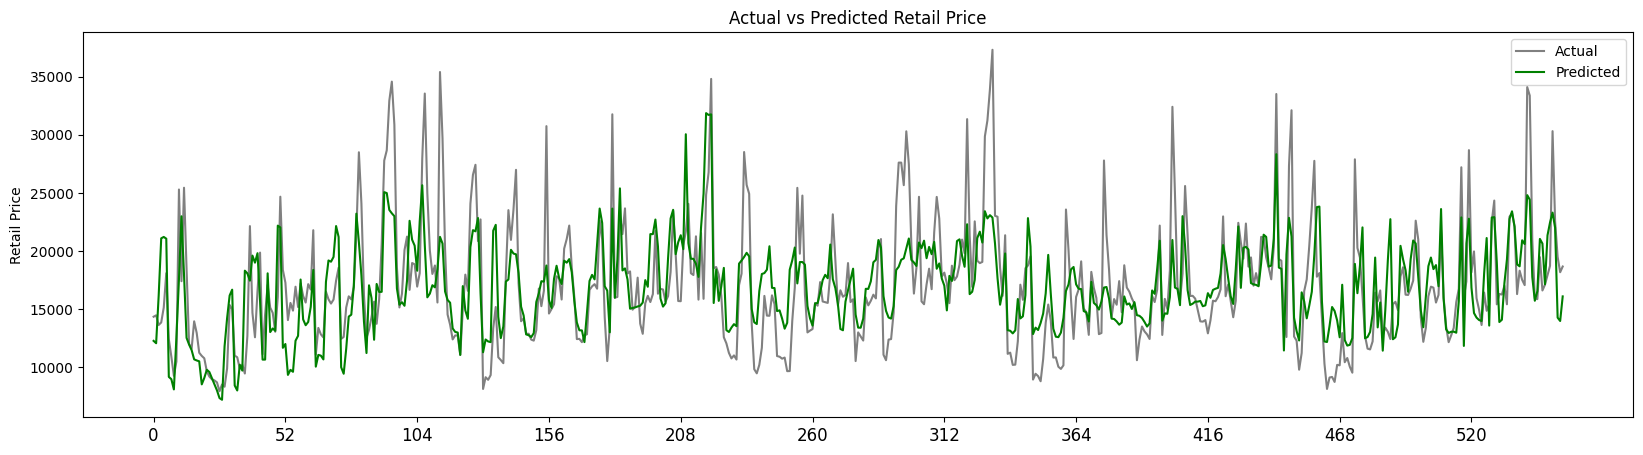

In [44]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### shap value

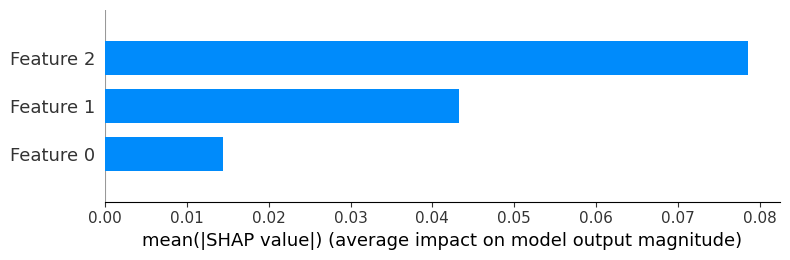

In [45]:
import shap

# 1. 해석하고자 하는 모델을 정규화된 데이터를 기반으로 SHAP 계산
explainer = shap.Explainer(lstm_model, X_scaled)  # rnn_model 사용
# SHAP 계산 (검증 데이터로 해석)
shap_values = explainer(X_val.reshape(X_val.shape[0], X_val.shape[1]))  # 2D 형태로 변환

# 2. SHAP 시각화
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]), plot_type='bar')

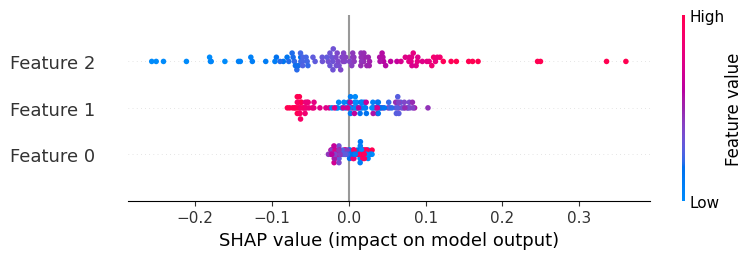

In [46]:
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]))

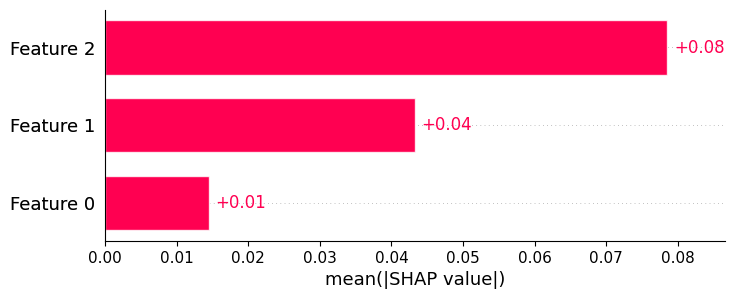

In [47]:
shap.plots.bar(shap_values)

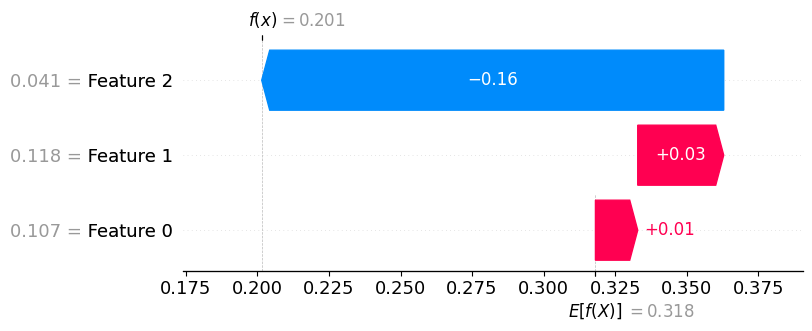

In [48]:
shap.plots.waterfall(shap_values[0])